In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import numpy.ma as ma
from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('..')

import src as sc

# Prepare Campus Data

The cell below can also be carried out in one step by running 
```
> cd src
> python locations.py 
```
from the top level directory.

In [2]:
# One-hot table with halls as rows and schools as columns.
hall_df = sc.get_hall_by_school_table()

# Dataframe with one row per enrolled student.
student_df = sc.get_student_enrollment_data()

# Proportionally assigns students to buildings, writing
# student dataframes to csv as:
#      "../data/filled_buildings/<building_name>_students.csv"

# sc.fill_buildings(student_df = student_df, hall_df = hall_df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


# Compute Cost & Assignment Matrix

The cell below can also be carried out in one step by running
```
> cd src
> python learning.py "assign_with_downsampling" -1 10 
```
from the top level directory.

In [3]:
# Load mappings
gender_map, race_map, region_map = sc.get_mapping_dicts()

# Load data
hall_df, student_df, art_df = sc.load_data()

# Get quantized student data.
gender_quant_s, race_quant_s, region_quant_s = sc.get_quantized_student_data(    
                                                    student_df,
                                                    gender_map, 
                                                    race_map, 
                                                    region_map)

# Get quantized  art data.
gender_quant_a, race_quant_a, region_quant_a = sc.get_quantized_art_data(    
                                                    art_df,
                                                    gender_map, 
                                                    race_map, 
                                                    region_map)
# Get art_capacity_df
art_capacity_df = sc.get_art_capacity_with_downsampling(art_df,
                    categories = ["gender","race"])
art_capacity_df

,tuple,string,original_index,capacity
0,"(1, 1)","Woman, White",2083,100.0
1,"(1, 2)","Woman, Asian",1394,4.0
2,"(1, 3)","Woman, Hispanics of any race",1399,4.0
3,"(1, 4)","Woman, Black or African American",1523,7.0
4,"(1, 5)","Woman, Two or more races",1819,17.0
5,"(1, 6)","Woman, American Indian or Alaska Native",1463,15.0
6,"(2, 1)","Man, White",1826,100.0
7,"(2, 2)","Man, Asian",26,35.0
8,"(2, 3)","Man, Hispanics of any race",1168,42.0
9,"(2, 4)","Man, Black or African American",480,45.0


In [5]:
# Get building_capacity_df.
building_capacity_df = sc.get_building_capacity_df()
building_capacity_df

,capacity
aidekman,225
anderson,2
ballou,47
capen_house,1
clic,1
dental_school,5
eaton_hall,1
fine_arts_house,3
gifford_house,24
goddard_chapel,15


In [6]:
# Compute full n_buildings x n_artworks cost matrix.
cost_df = sc.compute_cost_matrix(art_df = art_df, 
                                    hall_df = hall_df,
                                    categories = ["gender","race"],
                                    alpha = -.00001,
                                    beta = 1000000)

# Reduce cost df to remove duplicate columns.
cost_df = cost_df.rename(columns = {art_capacity_df.loc[i,"tuple"]:art_capacity_df.loc[i,"string"] for i in art_capacity_df.index})

cost_df

,"Woman, White","Woman, Asian","Woman, Hispanics of any race","Woman, Black or African American","Woman, Two or more races","Woman, American Indian or Alaska Native","Man, White","Man, Asian","Man, Hispanics of any race","Man, Black or African American","Man, Two or more races","Man, American Indian or Alaska Native"
aidekman,0.281913,0.0,0.0,0.0,0.0,0.191392,0.222775,0.000157,0.003927,0.037121,0.000119,0.262596
anderson,0.279279,0.0,0.0,0.0,0.0,0.191595,0.248784,0.000027,0.001027,0.018202,0.000028,0.261057
ballou,0.281962,0.0,0.0,0.0,0.0,0.191694,0.221143,0.000137,0.003419,0.03884,0.00011,0.262694
capen_house,0.084834,0.084834,0.084834,0.084834,0.084834,0.084834,0.084834,0.084834,0.084834,0.082095,0.069564,0.084834
clic,0.279279,0.0,0.0,0.0,0.0,0.191595,0.248784,0.000027,0.001027,0.018202,0.000028,0.261057
dental_school,0.167144,0.001941,0.000868,0.001882,0.008198,0.146858,0.161421,0.048881,0.099899,0.115217,0.088721,0.15897
eaton_hall,0.268601,0.0,0.0,0.0,0.0,0.221171,0.214409,0.000242,0.004446,0.040838,0.000142,0.250152
fine_arts_house,0.285179,0.0,0.0,0.0,0.0,0.194394,0.212604,0.000194,0.003611,0.038397,0.000082,0.265539
gifford_house,0.12816,0.003348,0.024036,0.073047,0.011575,0.12816,0.126494,0.077338,0.092092,0.115593,0.091997,0.12816
goddard_chapel,0.130124,0.001725,0.018663,0.044252,0.016275,0.130124,0.127928,0.09378,0.094798,0.119775,0.092434,0.130124


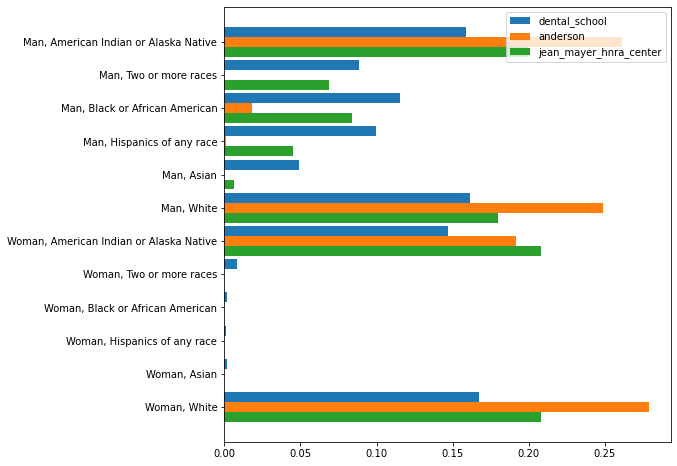

In [7]:
fig, ax = plt.subplots(figsize = (8,8))
height = 0.3
offset = .3
for i in ["dental_school","anderson","jean_mayer_hnra_center"]:
    ax.barh(y = [j + offset for j in range(cost_df.shape[1])],
            width = cost_df.loc[i,:].values, 
            label = i,
            height = height)
    offset += -0.3
    

ax.set_yticks([j for j in range(art_capacity_df.shape[0])])
ax.set_yticklabels(art_capacity_df["string"])
plt.legend()
plt.show()

In [9]:
P = sc.learn_optimal_assignment(cost_df, 
                             building_capacity_df, 
                             art_capacity_df, 
                             lam = 100) # lambda, you can change this.

# Convert the assignment array to a dataframe for readability.
# assignment_df = pd.DataFrame(P, index = cost_df.index,
#                   columns = art_capacity_df["string"].values)
P

,"Woman, White","Woman, Asian","Woman, Hispanics of any race","Woman, Black or African American","Woman, Two or more races","Woman, American Indian or Alaska Native","Man, White","Man, Asian","Man, Hispanics of any race","Man, Black or African American","Man, Two or more races","Man, American Indian or Alaska Native"
aidekman,127.907603,1.736802,0,3.764302,8.139303,6.929863,26.677961,13.481049,12.502623,14.718784,0.372257,8.769452
anderson,0,0,0,0,0,0,1.976668,0.009727,0,0.013606,0,0
ballou,0,0,12.289313,0.081882,2.886018,1.959629,10.724208,5.900618,4.018345,5.84855,0,3.291437
capen_house,0,0,0,0,0,0,1.0,0,0,0,0,0
clic,0,0,0,0,0,0,0.976668,0.009727,0,0.013606,0,0
dental_school,0,0,0,0,0,0.880921,3.440585,0.481858,0,0.196636,0,0
eaton_hall,0,0,0,0,0,0,0.989983,0.006884,0,0.003133,0,0
fine_arts_house,0,0,0,0,0,0,1.79118,1.205335,0,0.003486,0,0
gifford_house,0,0,0,0,0,0,5.138835,1.220407,16.638119,1.002639,0,0
goddard_chapel,0,0,0,0,0,0,3.798704,0.289636,0,10.91166,0,0


# Create Heatmap Visualization

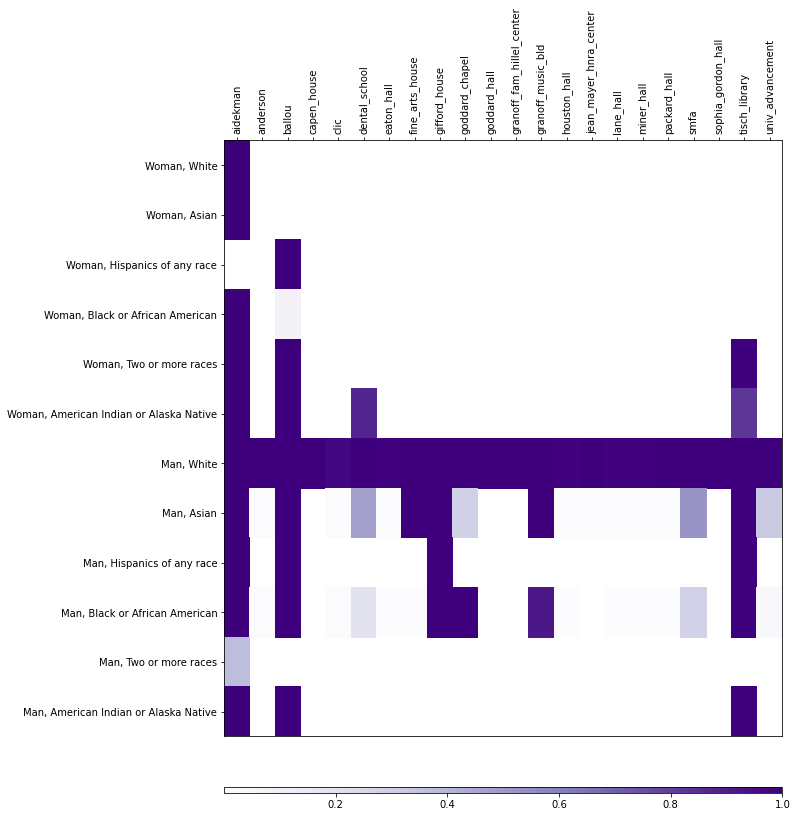

In [8]:
assignment_df = assignment_df.clip(upper = 1)
sc.assignment_heatmat(assignment_df)

## Validation

In the `validation_df` below, the column "Optimized" is the probability of a person from index category seeing their identity according to our assignment, whereas "Baseline" is the probablity of a person from index category seeing their identity accoridng to the current Tufts Gallery assignment.

In [8]:
validation_df = sc.validate_assignment(assignment_df)
validation_df

Optimized  Baseline
White                             Woman   0.043030  0.213143
                                  Man     0.797334  0.716602
Asian                             Woman   0.000568  0.019306
                                  Man     0.068048  0.011241
Hispanics of any race             Woman   0.020066  0.000000
                                  Man     0.015387  0.013620
Black or African American         Woman   0.001381  0.000000
                                  Man     0.030894  0.010483
Two or more races                 Woman   0.007692  0.001967
                                  Man     0.000128  0.000000
American Indian or Alaska Native  Woman   0.016904  0.000000
                                  Man     0.008075  0.000000
Nat. Hawaiian or Other Pac Island Woman   0.000000  0.000000
                                  Man     0.000000  0.000000